In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [1]:
import os
path=os.listdir('/content/drive/MyDrive/brain_tumor')
classes={'no_tumor':0,'pituitary_tumor':1}

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2
x=[]
y=[]
for cls in classes:
    pth='/content/drive/MyDrive/brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img=cv2.imread(pth+'/'+j,0)
        img=cv2.resize(img,(200,200))
        x.append(img)
        y.append(classes[cls])

In [6]:
np.unique(y)

array([0, 1])

In [7]:
x=np.array(x)
y=np.array(y)

In [8]:
pd.Series(y).value_counts()

1    827
0    398
dtype: int64

In [9]:
x.shape

(1225, 200, 200)

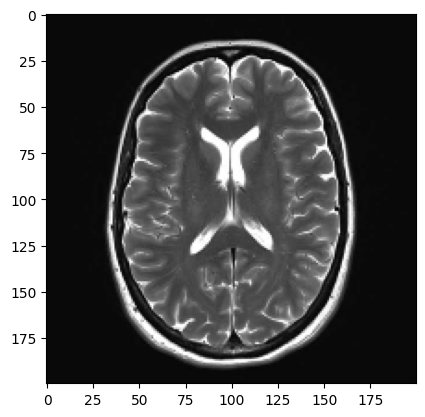

In [10]:
plt.imshow(x[0],cmap='gray')

In [11]:
x_updated=x.reshape(len(x),-1)
x_updated.shape

(1225, 40000)

In [12]:
xtrain, xtest, ytrain, ytest=train_test_split(x_updated,y,random_state=10,test_size=.20)

In [13]:
xtrain.shape,xtest.shape

((980, 40000), (245, 40000))

In [14]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain=xtrain/255
xtest=xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [16]:
import warnings
warnings.filterwarnings('ignore')
lg=LogisticRegression(C=0.1)
lg.fit(xtrain,ytrain)

LogisticRegression(C=0.1)

In [17]:
sv=SVC()
sv.fit(xtrain,ytrain)

SVC()

In [18]:
print("Training score:",lg.score(xtrain,ytrain))
print("Testing score:",lg.score(xtest,ytest))

Training score: 1.0
Testing score: 0.9591836734693877


In [19]:
print("Training score:",sv.score(xtrain,ytrain))
print("Testing score:",sv.score(xtest,ytest))

Training score: 0.9928571428571429
Testing score: 0.9591836734693877


In [20]:
pred=sv.predict(xtest)
np.where(ytest!=pred)

(array([ 62,  65,  81, 142, 161, 168, 191, 192, 214, 236]),)

In [21]:
dec={0:'No tumor',1:'Positive tumor'}

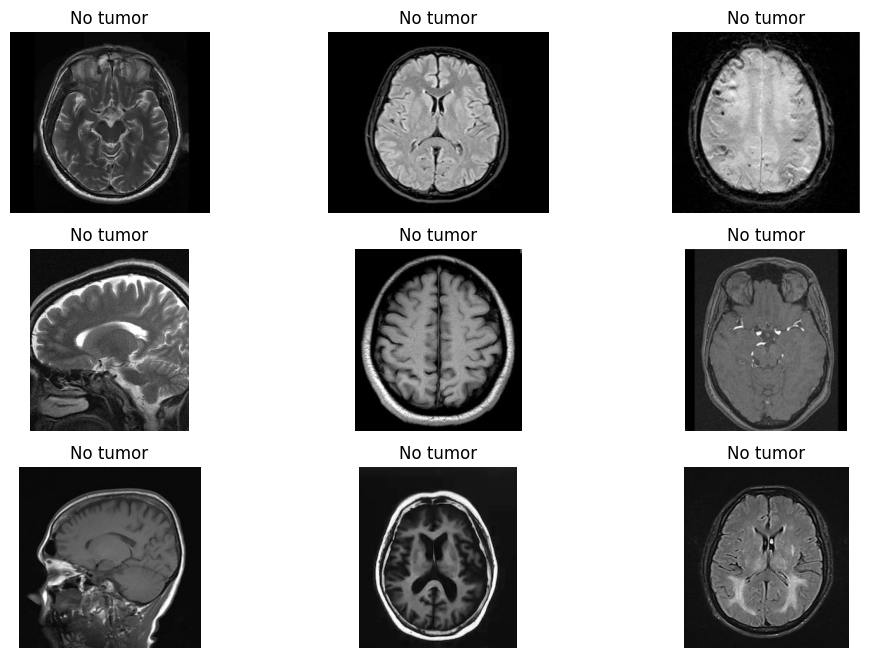

In [22]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/brain_tumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/brain_tumor/Testing/no_tumor/')[11:20]:
    plt.subplot(3,3,c)

    img =cv2.imread('/content/drive/MyDrive/brain_tumor/Testing/no_tumor/'+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

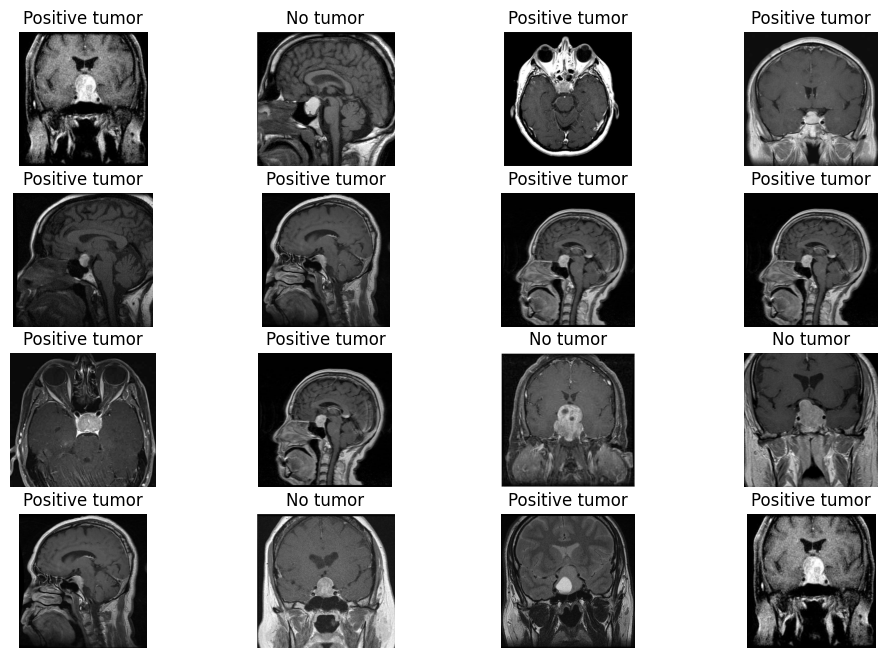

In [23]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/brain_tumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)

    img =cv2.imread('/content/drive/MyDrive/brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1